In [1]:
#import libary yang dibutukan
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import time
import itertools

In [3]:
#baca dataset dari file
datasetPath = "dataku.txt"
dataset = np.loadtxt(datasetPath, delimiter=" ")

In [4]:
#mendefinisikan parameter k-means klustering
k = 2 #jumlah klaster yg diinginkan
iterationCounter = 0 #counter untuk iterasi
input = dataset #input data

In [5]:
#fungsi untuk inisialisi titik pusat klaster (random)
def initCentroid(dataIn, k):
    result = dataIn[np.random.choice(dataIn.shape[0], k, replace=False)]
    return result

In [6]:
#fungsi untuk plot hasil klaster per iterasi
def plotClusterResult(listClusterMembers, centroid, iteration, converged):
    n = listClusterMembers.__len__()
    color = iter(cm.rainbow(np.linspace(0, 1, n)))
    plt.figure("result")
    plt.clf()
    plt.title("iteration-" + iteration)
    marker = itertools.cycle(('.', '*', '^', 'x', '+'))
    for i in range(n):
        col = next(color)
        memberCluster = np.asmatrix(listClusterMembers[i])
        plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]),
                    marker=marker.__next__(), s=100, c=col, label="klaster-"+str(i+1))
    for i in range(n):
        plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker=marker.__next__()
                    , c=col, label="centroid-" + str(i + 1))
    if(converged == 0):
        plt.legend()
        plt.ion()
        plt.show()
        plt.pause(0.1)
    if (converged == 1):
        plt.legend()
        plt.show(block=True)

In [7]:
#fungsi utama algoritma k-means
def kMeans(data, centroidInit):
    nCluster = k #banyaknya klaster
    global iterationCounter
    centroidInit = np.matrix(centroidInit)
    # looping hingga konvergen
    while(True):
        iterationCounter +=1
        euclideanMatrixAllCluster = np.ndarray(shape=(data.shape[0], 0))
        #ulangi proses untuk semua klaster
        for i in range(0, nCluster):
            centroidRepeated = np.repeat(centroidInit[i,:], data.shape[0], axis=0)
            deltaMatrix = abs(np.subtract(data,centroidRepeated))
            #hitung jarak Euclidean
            euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
            euclideanMatrixAllCluster = \
                np.concatenate((euclideanMatrixAllCluster, euclideanMatrix), axis=1)
        #tempatkan data ke klaster yang jarak Euclideannya plg dekat
        clusterMatrix = np.ravel(np.argmin(np.matrix(euclideanMatrixAllCluster), axis=1))
        listClusterMember = [[] for i in range(k)]
        for i in range(0, data.shape[0]):#assign data to cluster regarding cluster matrix
            listClusterMember[np.asscalar(clusterMatrix[i])].append(data[i,:])
        #hitung titik pusat klaster terbaru
        newCentroid = np.ndarray(shape=(0, centroidInit.shape[1]))
        for i in range(0,nCluster):
            memberCluster = np.asmatrix(listClusterMember[i])
            centroidCluster = memberCluster.mean(axis=0)
            newCentroid = np.concatenate((newCentroid, centroidCluster), axis=0)
        print("iter: ", iterationCounter)
        print("centroid: ", newCentroid)
        #break dari loop jika sudah konvergen
        if((centroidInit == newCentroid).all()):
            break
        # update titik pusat klaster dengan nilai yg baru
        centroidInit = newCentroid
        #plot hasil klaster per iterasi
        plotClusterResult(listClusterMember, centroidInit, str(iterationCounter), 0)
        time.sleep(1) #diberi jeda 1 detik agak hasil plot klaster nyaman dilihat
    return listClusterMember, centroidInit

<ipython-input-7-31e78600224a>:22: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  listClusterMember[np.asscalar(clusterMatrix[i])].append(data[i,:])
<ipython-input-6-38c9e6c6c650>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]),
<ipython-input-6-38c9e6c6c650>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
 

iter:  1
centroid:  [[ 1.81458889 -5.56414691]
 [-1.84254496  3.90706723]]


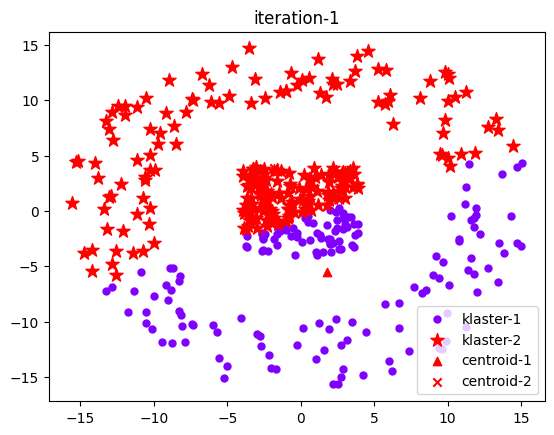

iter:  2
centroid:  [[ 1.6938707  -5.79236306]
 [-1.68930041  3.85963457]]


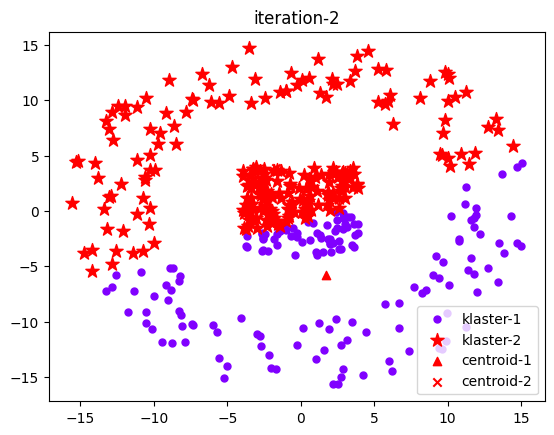

iter:  3
centroid:  [[ 1.72800449 -5.8152141 ]
 [-1.6972582   3.83468689]]


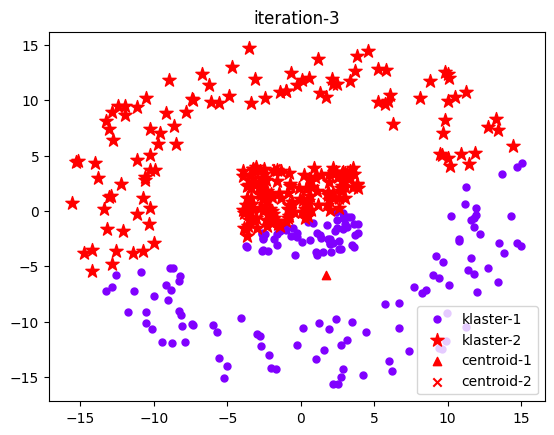

iter:  4
centroid:  [[ 1.72351613 -5.85192065]
 [-1.68043796  3.81852204]]


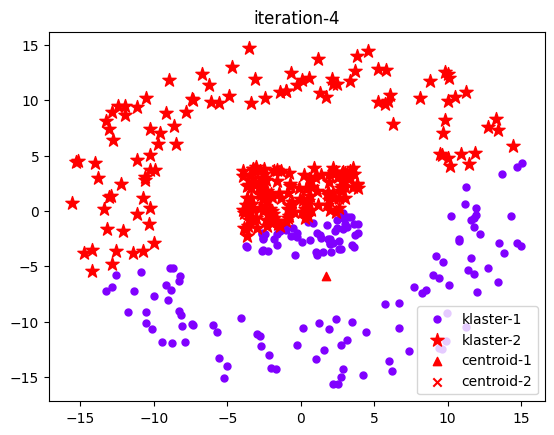

iter:  5
centroid:  [[ 1.63668831 -5.91796948]
 [-1.61224512  3.82055894]]


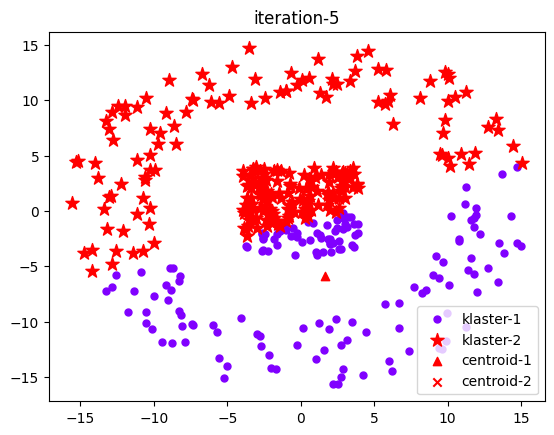

iter:  6
centroid:  [[ 1.55133268 -5.98266732]
 [-1.54621943  3.82120769]]


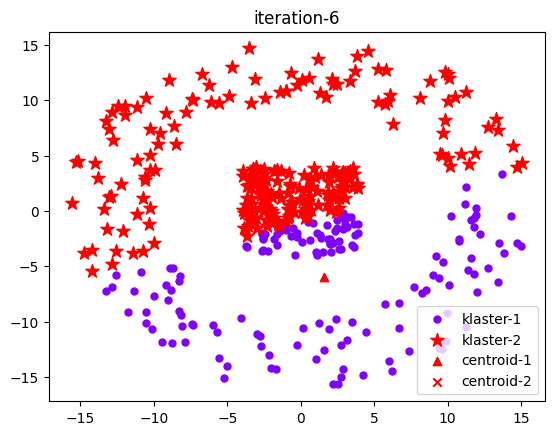

iter:  7
centroid:  [[ 1.47128947 -6.04396382]
 [-1.48467056  3.81924476]]


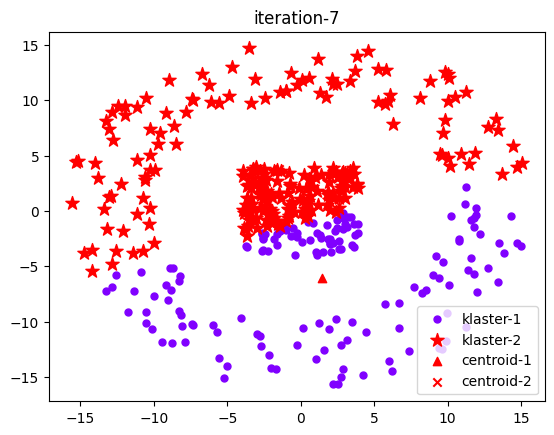

iter:  8
centroid:  [[ 1.32617516 -6.05286078]
 [-1.40674939  3.86468785]]


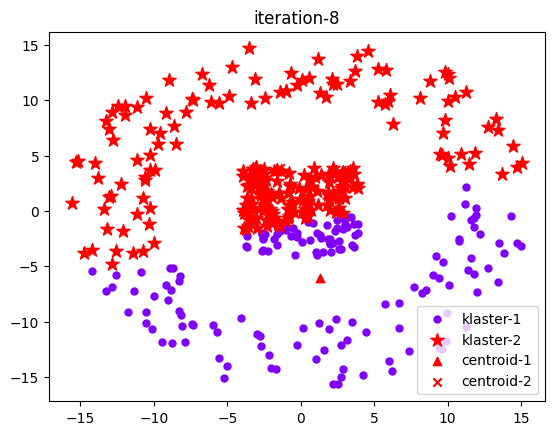

iter:  9
centroid:  [[ 1.16837386 -6.09824379]
 [-1.30900202  3.8927996 ]]


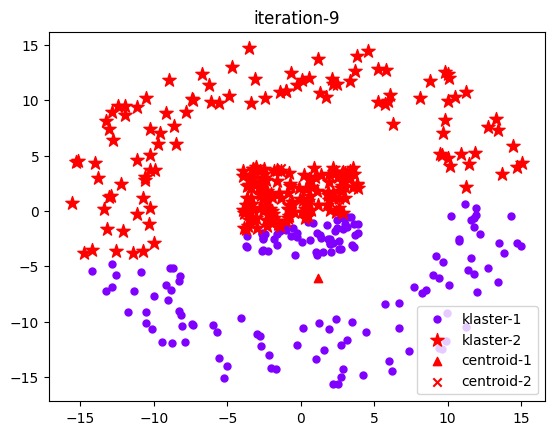

iter:  10
centroid:  [[ 1.16837386 -6.09824379]
 [-1.30900202  3.8927996 ]]


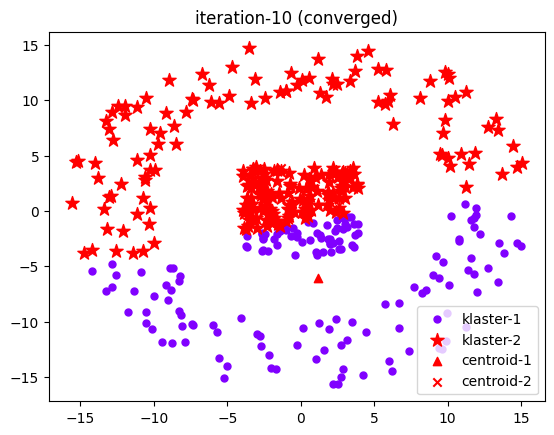

In [8]:
#panggil fungsi inisialisasi klater
centroidInit = initCentroid(input, k)
#panggil fungsi k-means
clusterResults, centroid = kMeans(input, centroidInit)
#plot hasil final klaster setelah konvergen
plotClusterResult(clusterResults, centroid, str(iterationCounter) + " (converged)", 1)